# **Definição do Problema**

Escolhi essa base de dados pela aproximação que possui com meu trabalho.

Trabalho em banco e meu dataset escolhido foi uma campanha de telemarketing de um Banco para oferta de um produto investimento(Depósito a prazo).

Gostaria de saber, dentre uma carteira de clientes, quais são os potenciais clientes para contratação de determinando produto investimento.

A minha ideia é criar um modelo de aprendizado supervisionado para um problema de classificação binário, ou seja, um modelo que preveja quais clientes contratarão o produto, através de análise do perfil dos clientes em potencial...

O conjunto de dados que utilizarei, possui os seguintes atributos:

age (idade),

job (profissão),

marital (estado civil),

education (nível de escolaridade),

default (se tem crédito inadimplente),

balance (saldo médio anual em euro),

housing (se tem financiamento imobiliário),

loan (se tem empréstimo pessoal),

contact (tipo de contato),

day (último dia de contato no mês),

month (último mês de contato no ano),

duration (duração do último contato em segundos),

campaign (número de contatos realizados durante esta campanha para cada cliente),

pdays (número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior),

previous (número de contatos realizados antes desta campanha e para cada cliente),

poutcome (resultado da campanha de marketing anterior),

e deposit (se o cliente contratou o produto ou não).




In [50]:
# Importação de pacotes.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carga do Dataset**

Carregando dataset através de um arquivo que chamei de "arquivo".




In [51]:
# Dataset "arquivo".
arquivo = pd.read_csv('https://raw.githubusercontent.com/Thataag/MPV-Analise-de-dados/refs/heads/main/base/bank.csv')


Meu objetivo ao final, portanto, seria a criação de um modelo que prediga quem irá contratar o produto investimento ofertado pelo banco na campanha de marketing( clientes que subscreverão depósitos à prazo).

Acredito que , clientes que já possuem empréstimos pessoais, possuem o perfil "tomador" e estão menos propensos a contratarem produtos de investimento como depósitos à prazo. Estes constam na tabela 'loan'. Mas sigamos com a análise ...


# **Análise Exploratória**

**Informações Gerais e Estatísticas Descritivas**

In [52]:
# Dimensões do dataset
arquivo.shape

(11162, 17)

O dataset possui 11.162 linhas e 17 colunas

In [53]:
# Informações do dataset
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


São 7 colunas numéricas, todas do tipo int64 e 10 categóricas do tipo object.

In [54]:
# Mostra as 10 últimas linhas do dataset
arquivo.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


A consulta acima me chamou atenção para coluna 'pdays'(número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior) com registros -1. Me parece inconsistente.

In [55]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
arquivo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


No resumo estatístico, a coluna 'pdays' novamente me chama atenção, especialmente no primeiro quartil e mediana (segundo quartil).

### **Visualizações Unimodais**

Minha base possui colunas categóricas e numéricas. Vou analisar primeiramente as colunas categóricas gerando gráficos para melhor interpretação.

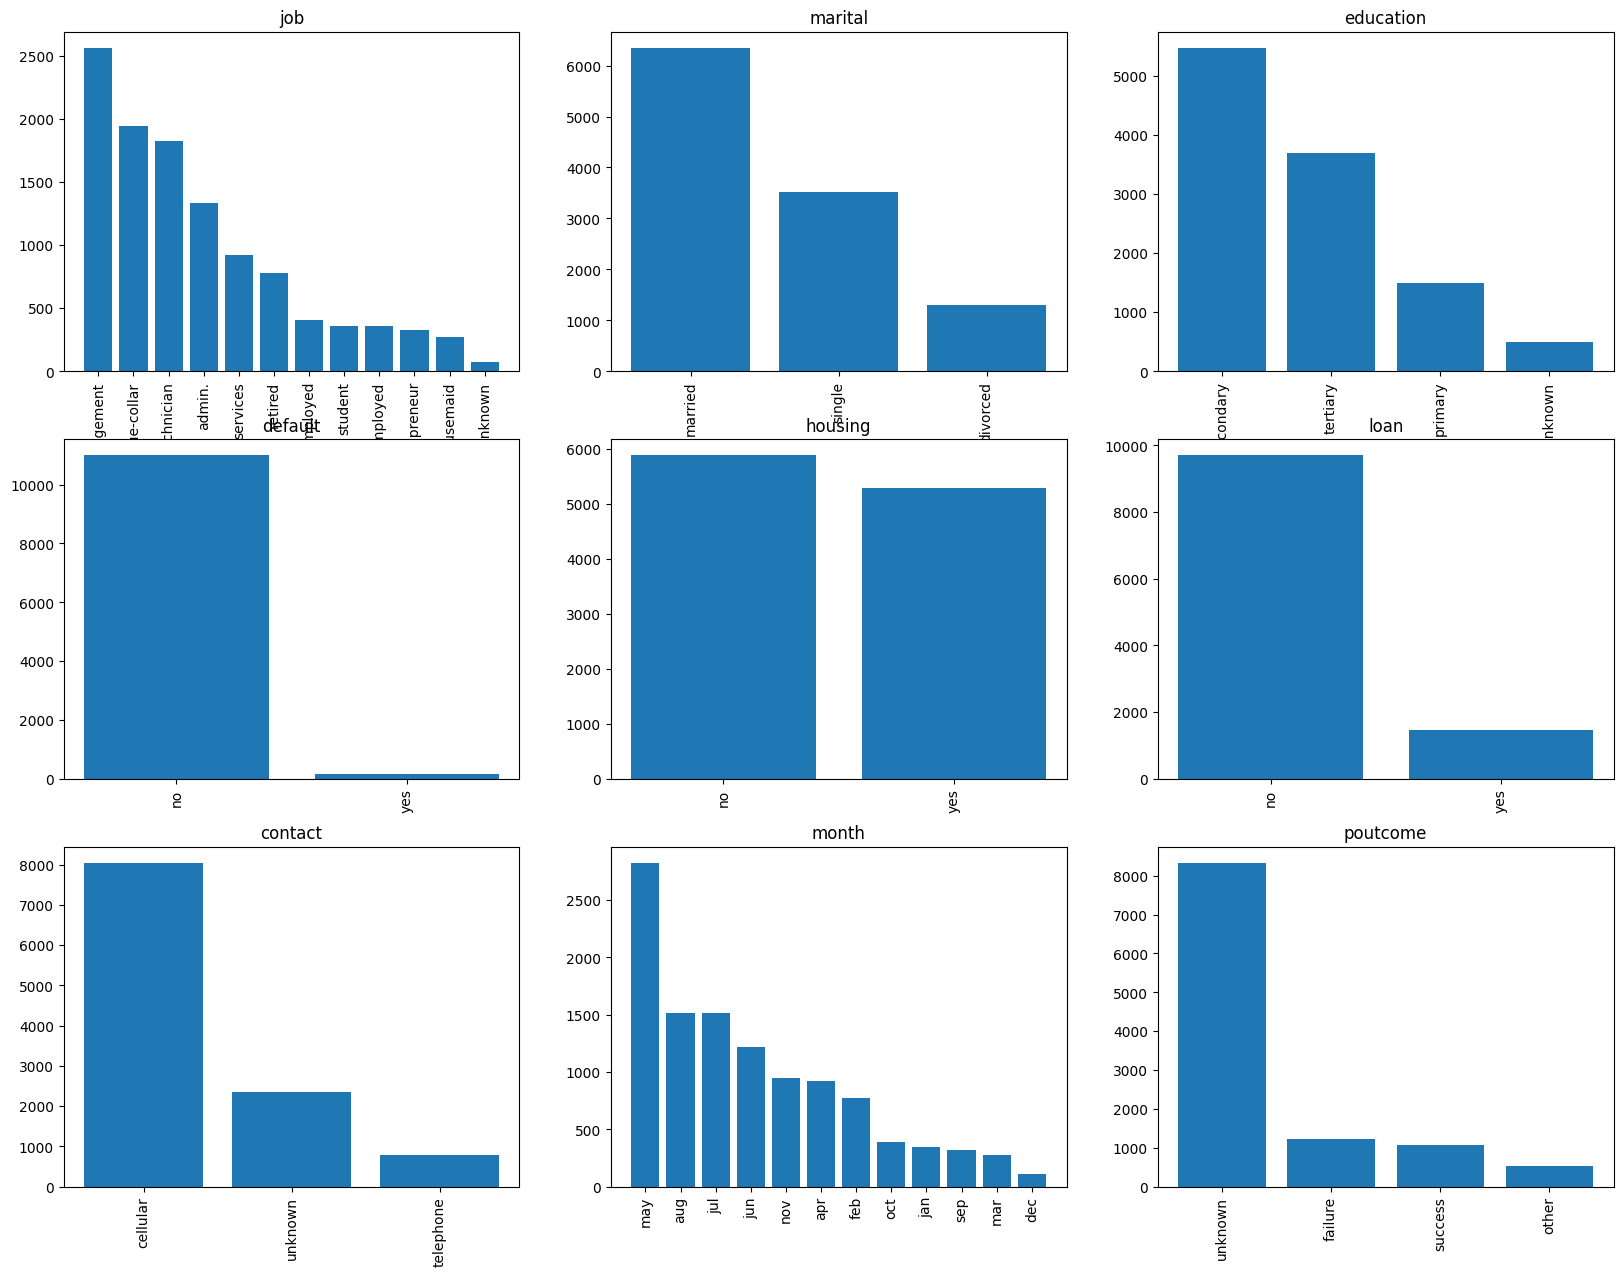

In [56]:
# Discriminando colunas categóricas.

cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Configurando os gráficos.

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = arquivo[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()

Agora vou analisar as colunas numéricas, também por meio de histogramas

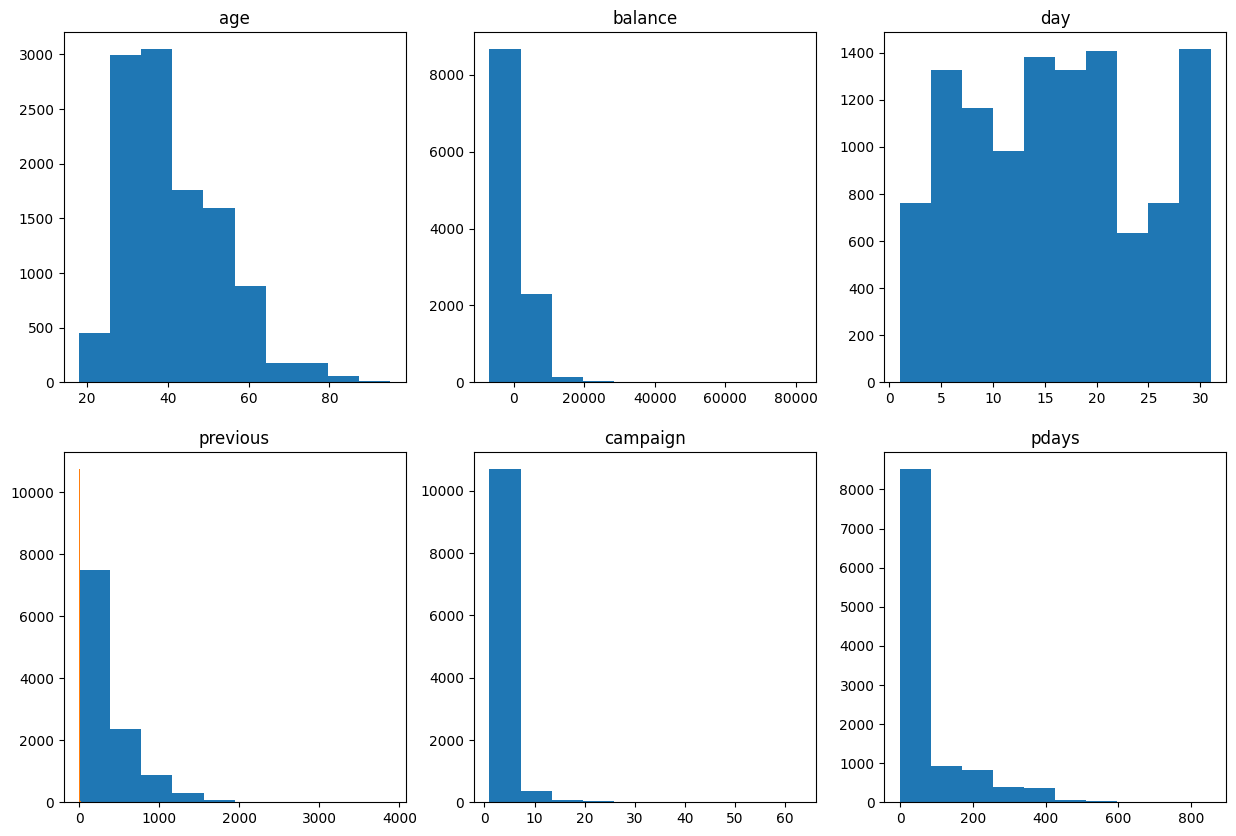

In [57]:
# Analisando as colunas numéricas por meio de histogramas.

num_columns = ['age','balance','day', 'duration','campaign','pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))

counter = 0
for num_column in num_columns:

    trace_x = counter // 3
    if trace_x > 1:
        trace_x = 1
    trace_y = counter % 3

    axs[trace_x, trace_y].hist(arquivo[num_column])

    axs[trace_x, trace_y].set_title(num_column)

    counter += 1

plt.show()

In [58]:
# Analisando as colunas 'campaign'e 'previous'. Possuem muita discrepância.

arquivo[['campaign', 'previous']].describe()

,campaign,previous
count,11162.000000,11162.000000
mean,2.508421,0.832557
std,2.722077,2.292007
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,63.000000,58.000000


Vou precisar tratar as 'colunas campaign' e 'previous', provavelmente imputando a média pois percebo que há muito ruído nesses atributos.

Vou continuar gerando gráficos para melhor visualização...

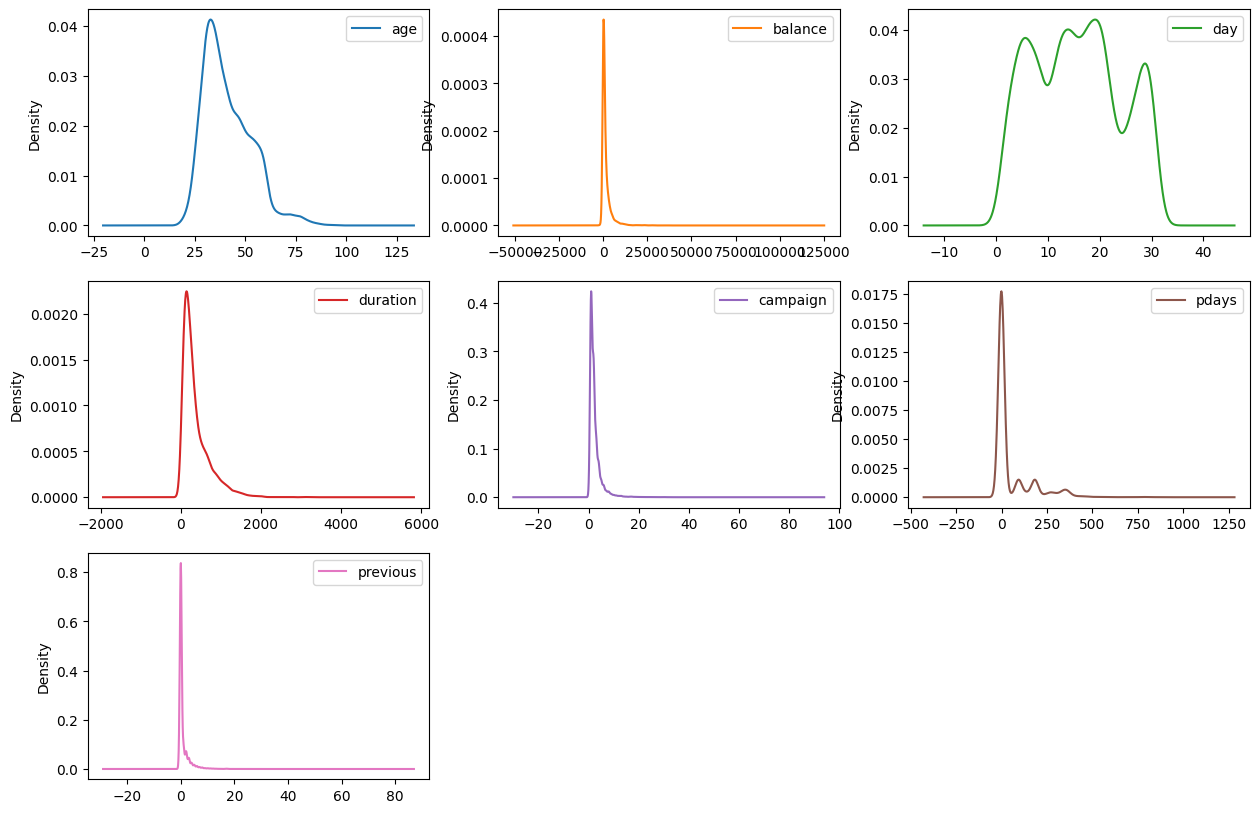

In [59]:
# Visualizando densidade
arquivo.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

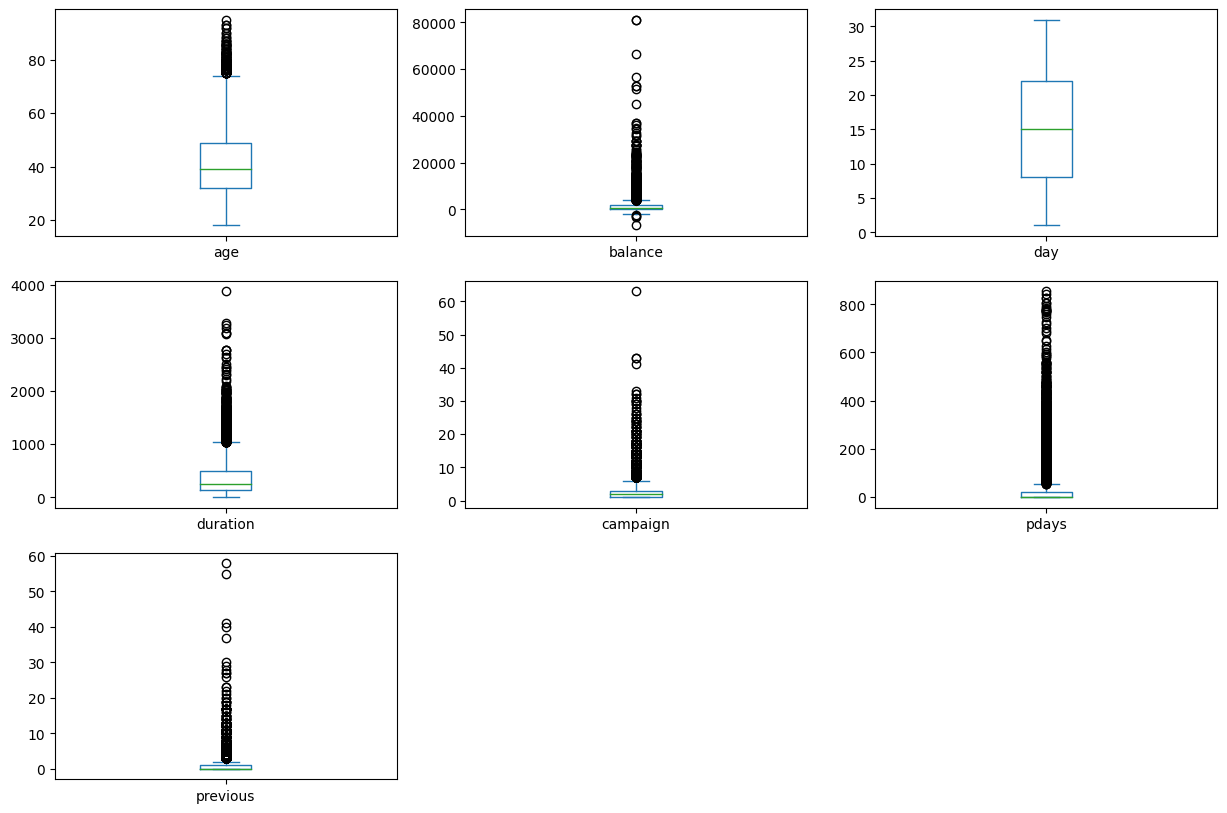

In [60]:
# Boxplot
arquivo.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### **Visualizações Multimodais**

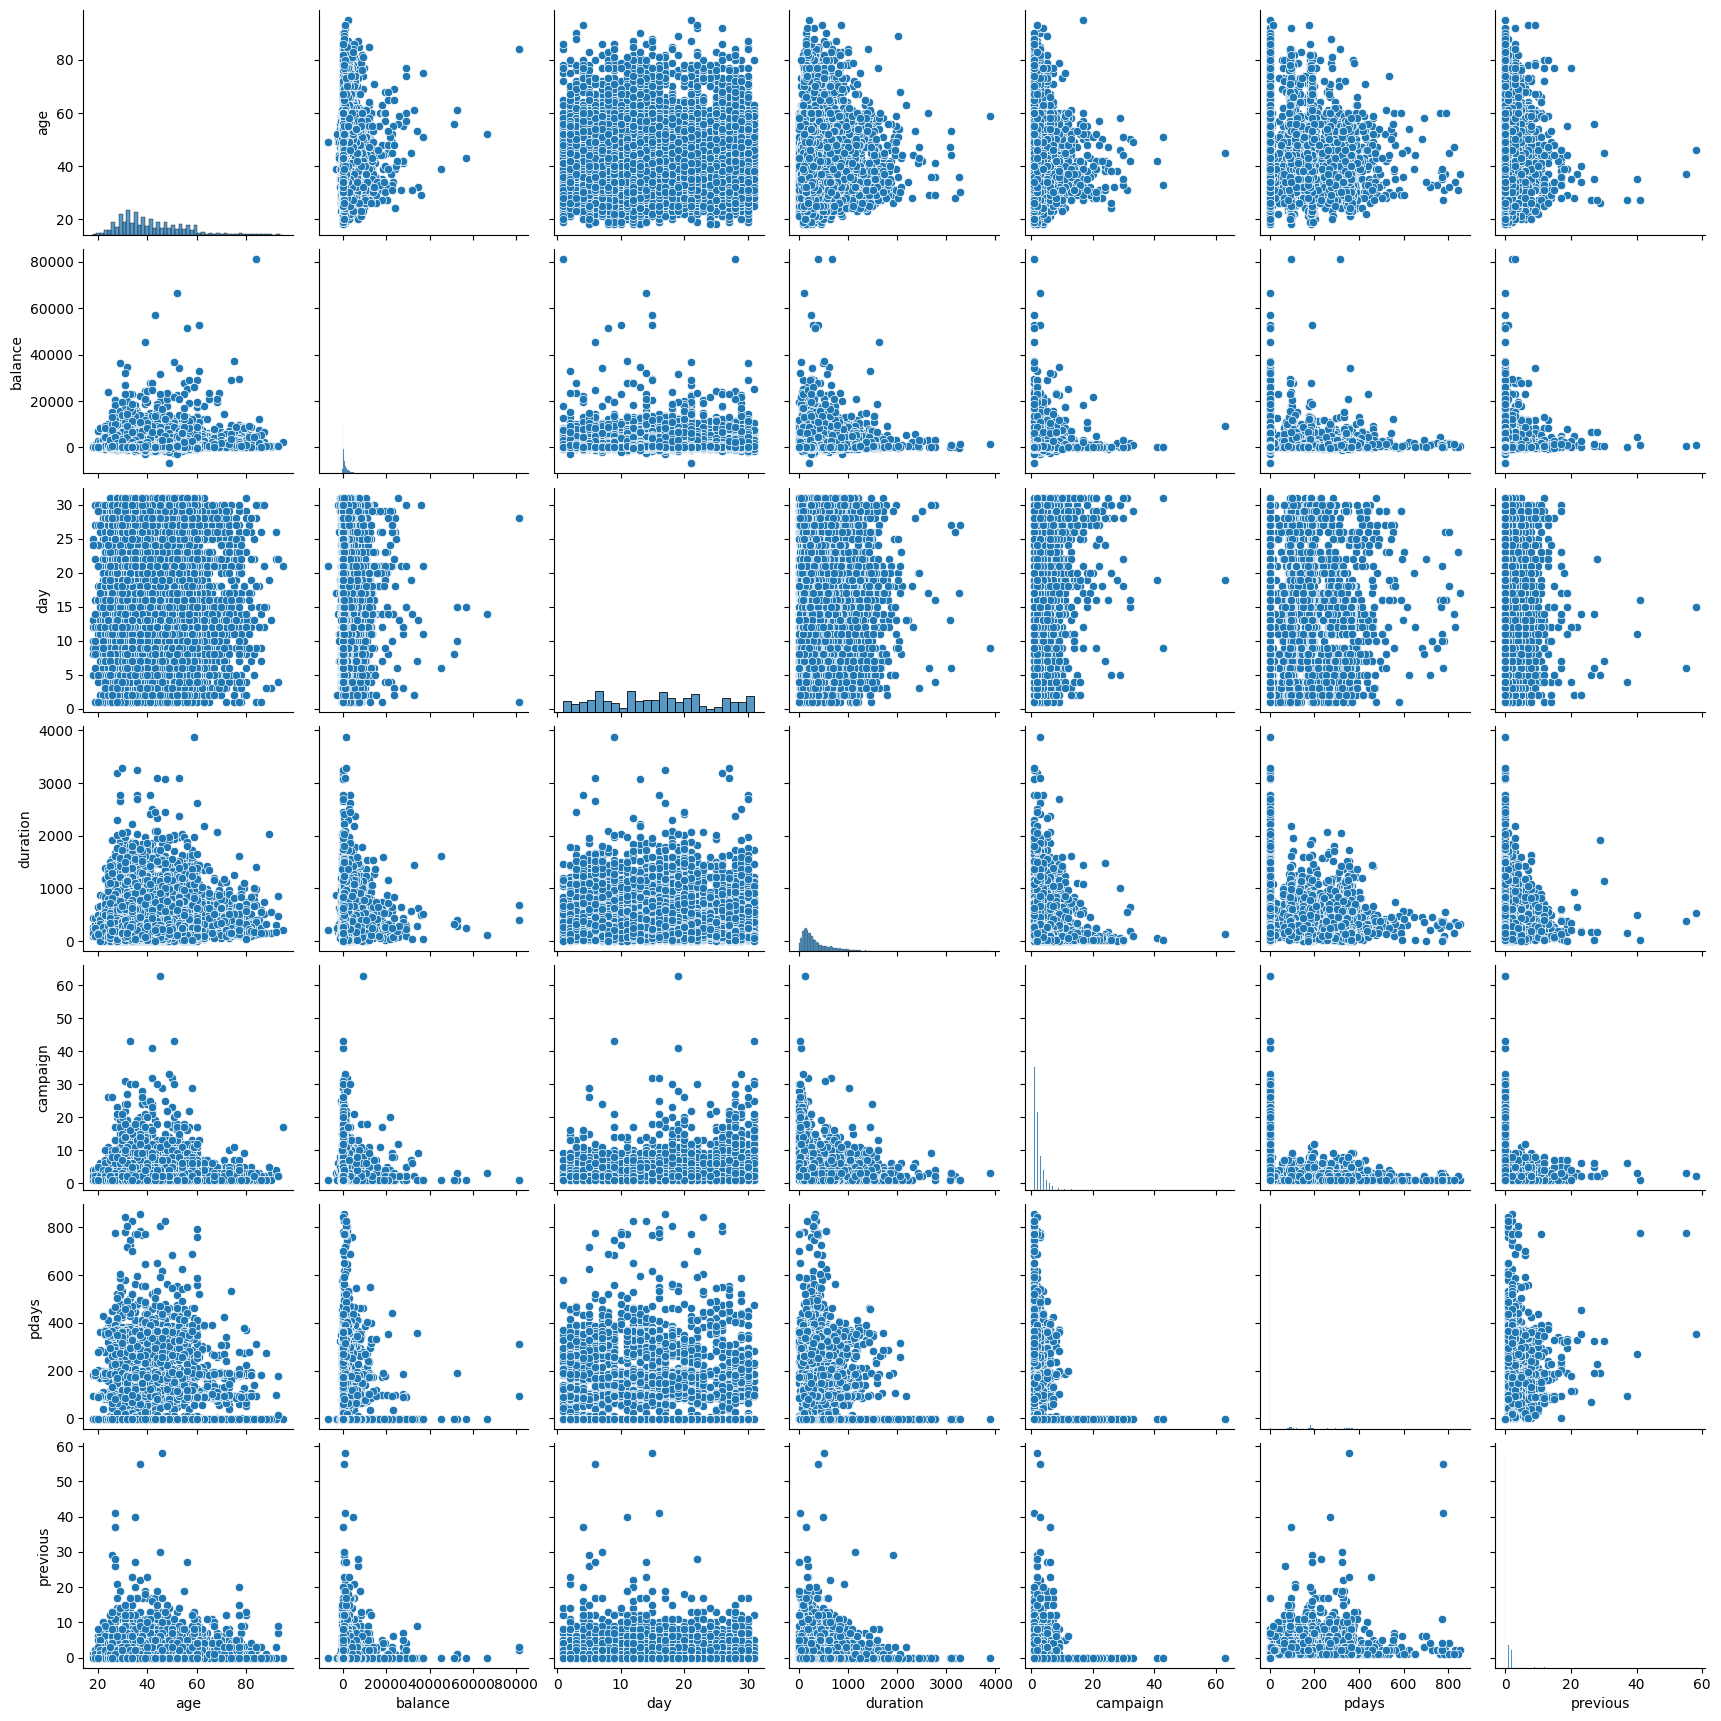

In [61]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(arquivo)

Observando a coluna 'deposit'(coluna de resposta): Os valores são bem equilibrados, portanto, se esse MVP solicitasse que fosse apresentada a criação de um modelo, acredito que a acurácia pode ser uma boa opção de métrica para modelo de previsão da campanha de marketing.

<Axes: title={'center': 'Deposit contracted'}, xlabel='deposit'>

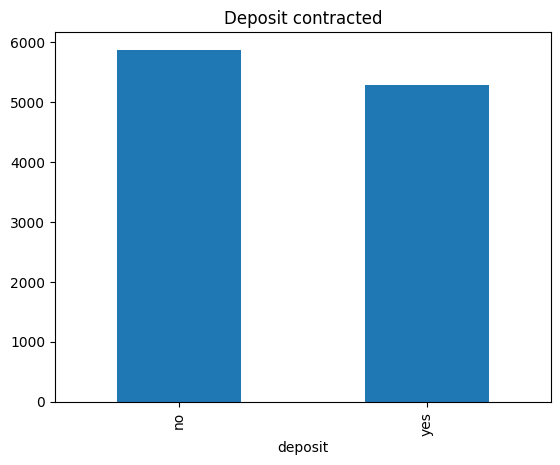

In [62]:
# Analisando a coluna de resposta.
value_counts = arquivo['deposit'].value_counts()

value_counts.plot.bar(title = 'Deposit contracted')

# **Pré-Processamento**

**Verificando necessidade de tratamento de missings**

In [63]:
# Consultando para ver se a base possui algum registro em branco.

missing_values = arquivo.isnull().mean()*100

missing_values.sum()

0.0

Não possui missings. Prosseguindo...


Para ficar mais claro, vou renomear a coluna "deposit" que passará a se chamar "contracted".

In [64]:
arquivo = arquivo.rename(columns={'deposit': 'contracted'})

# Verificando como ficou.

arquivo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,contracted
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


A Coluna "campaign" indica os contatos realizados durante a campanha. Observei na etapa de análise, que os valores acima de 33 são ruídos.
Vou imputar valores médios de campanha, portanto, ao tratar valores acima de 33 nessa coluna.

A coluna "previous" indica os contatos efetuados previamente a esta campanha. Também observei que valores acima de 33 são destoantes.
Vou imputar valores médios de contatos prévios, portanto, ao tratar valores acima de 33 nessa coluna.

In [65]:
# Analisando a coluna 'campaign'.

len (arquivo[arquivo['campaign'] > 33]) / len(arquivo) * 100

0.035835871707579285

In [66]:
# Analisando coluna 'previous'.

len (arquivo[arquivo['previous'] > 33] ) / len(arquivo) * 100

0.04479483963447411

A seguir, vou tratar a base, preparando conjunto de dados para processo:

Primeiro, criando função para receber uma linha do dataframe e o nome da coluna, se o valor na coluna especificada for "yes", retorna 1; caso contrário, retorna 0.

Em seguida, criando função para receber linha do dataframe, nome da coluna, um limite e o dataframe. Se o valor da referida coluna for inferior ou igual ao limite, retorna o próprio valor . Se não for, a função calcula a média dos valores menores ou iguais ao limite da coluna e retorna esse valor médio.

Depois, fazendo a limpeza da base. Função para receber o dataframe (arquivo) contendo um conjunto de dados de campanha bancária e retornar um dataframe limpo. Cria uma cópia do dataframe original (cleaned_arquivo).

Por fim, transformando colunas categóricas em numéricas:
Fazendo coversão de sim/não para boleanas e fazendo codificação one-hot de todas as demais colunas categóricas especificadas na lista "cat_columns" e atualizando o DataFrame "cleaned_arquivo" com as novas colunas dummy.

Deletando a coluna 'pdays' que considerei irrelevante e inconsistente.

Fiz ainda, o tratamento das colunas 'campaign' e 'previous':
Alterando valores destoantes das colunas "campaign" e "previous" e descartando as colunas originais, conforme a análise que fiz anteriormente sobre os valores acima de 33.

In [67]:
# Preparando conjunto de dados para processo.


def get_dummy_from_bool(row, column_name):
    return 1 if row[column_name] == 'yes' else 0


def get_correct_values(row, column_name, threshold, df):

    if row[column_name] <= threshold:
        return row[column_name]
    else:
        mean = arquivo[arquivo[column_name] <= threshold][column_name].mean()
        return mean

# Fazendo a limpeza da base.

def clean_data(arquivo):

    cleaned_arquivo = arquivo.copy()

# Convertendo colunas sim/não em boleanas
    bool_columns = ['contracted', 'housing', 'loan', 'default']
    for bool_col in bool_columns:
        cleaned_arquivo[bool_col + '_bool'] = arquivo.apply(lambda row: get_dummy_from_bool(row, bool_col),axis=1)

    cleaned_arquivo = cleaned_arquivo.drop(columns = bool_columns)

# Convertendo colunas categóricas em variáveis ​​fictícias (dummy).

    cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

    for col in  cat_columns:
      cleaned_arquivo = pd.concat(
        [
          cleaned_arquivo.drop(col, axis=1),
          pd.get_dummies(
              cleaned_arquivo[col],
              prefix=col,
              prefix_sep='_',
              drop_first=True,
              dummy_na=False
          )
        ],
        axis=1
      )

# Deletando coluna que considerei irrelevante por ser bastante discrepante e ruidosa.
    cleaned_arquivo = cleaned_arquivo.drop(columns = ['pdays'])

# Alterando valores destoantes das colunas "campaign" e "previous"
    cleaned_arquivo['campaign_cleaned'] = arquivo.apply(lambda row: get_correct_values(row, 'campaign', 33, cleaned_arquivo),axis=1)
    cleaned_arquivo['previous_cleaned'] = arquivo.apply(lambda row: get_correct_values(row, 'previous', 33, cleaned_arquivo),axis=1)

    cleaned_arquivo = cleaned_arquivo.drop(columns = ['campaign', 'previous'])

    return cleaned_arquivo

In [68]:
# Limpando o dataset e conferindo.
cleaned_arquivo = clean_data(arquivo)
cleaned_arquivo.head()

,age,balance,day,duration,contracted_bool,housing_bool,loan_bool,default_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,previous_cleaned
0,59,2343,5,1042,1,1,0,0,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
1,56,45,5,1467,1,0,0,0,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
2,41,1270,5,1389,1,1,0,0,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
3,55,2476,5,579,1,1,0,0,False,False,...,False,True,False,False,False,False,False,True,1.0,0.0
4,54,184,5,673,1,0,0,0,False,False,...,False,True,False,False,False,False,False,True,2.0,0.0


<Axes: title={'center': 'Contracted Result'}, xlabel='contracted_bool'>

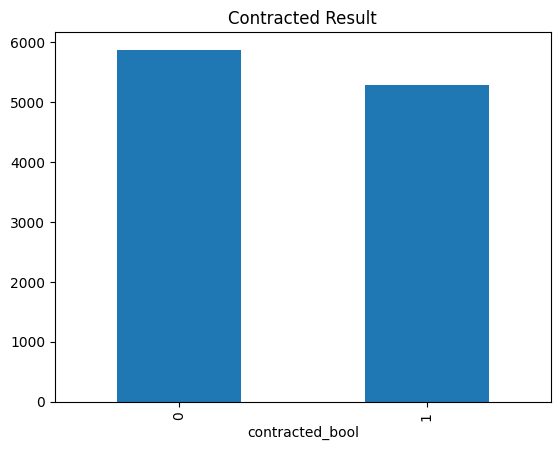

In [69]:
# Verificando os valores da coluna "contracted_bool" do dataframe "cleaned_arquivo" e gerando gráfico para melhor visualização.

value_counts = cleaned_arquivo['contracted_bool'].value_counts()

value_counts.plot.bar(title = 'Contracted Result')

Separando as variáveis entre preditoras e variável alvo:

In [70]:
# Variáveis preditoras e variável alvo.
y = cleaned_arquivo['contracted_bool']
x = cleaned_arquivo.drop('contracted_bool', axis = 1)

Abaixo:
Criando conjunto de dados de treino e teste. Usarei 30% dos dados para teste e 70% para treinamento e parâmentro random_state 42.
Importando a função train_test_split do módulo model_selection da biblioteca Scikit-learn.

In [71]:
# Criando conjunto de dados de treino e teste.

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

Para meu problema de classificação binária, penso inicialmente que seria interessante a Regressão Logística, mas testaria também outros algoritmos. E minha etapa de pré-processamento encerra aqui.